In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import Gaussian2D
from astropy.coordinates import Angle

%matplotlib inline

### Generate fake image (Gaussian)

In [2]:
imgsize = 256

In [3]:
x0, y0 = imgsize/2, imgsize/2 # center
a, b = 20, 10 # stddev
theta = Angle(30, 'deg') # position angle
amplitude=1 #/1256.6370614343305

e = Gaussian2D(amplitude=amplitude, x_mean=x0, y_mean=y0, x_stddev=a, y_stddev=b, theta=theta.radian)

In [4]:
y, x = np.mgrid[0:imgsize, 0:imgsize]

f = e(x, y)

In [5]:
np.sum(f)

1256.6370614343305

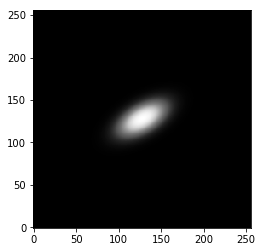

In [6]:
fig, ax = plt.subplots(1, 1)
ax.imshow(f, origin='lower', interpolation='none', cmap='Greys_r')

In [7]:
F = np.fft.fft2(f)
print(F.shape)

(256, 256)


In [8]:
F_mag = np.abs(np.fft.fftshift(F))
F_phase = np.angle(np.fft.fftshift(F))

/home/ridlo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log


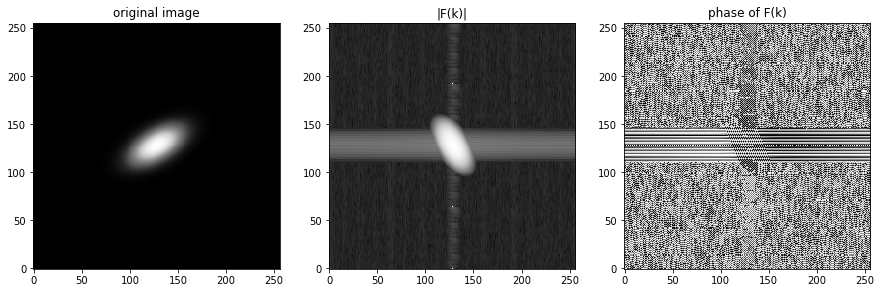

In [9]:
plt.rc("font", size=10)
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(f, origin='lower', cmap='Greys_r')
plt.title("original image")

plt.subplot(132)
plt.imshow(np.log(F_mag), origin='lower', cmap='Greys_r')
plt.title("|F(k)|")

plt.subplot(133)
plt.imshow(F_phase, origin='lower', cmap='Greys_r')
plt.title("phase of F(k)")

plt.show()

1256.6370614343314

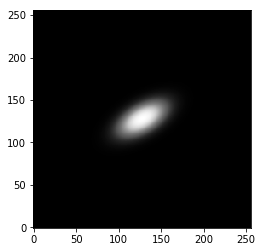

In [10]:
# inverse again to check
Fnew = F_mag*np.exp(1j*F_phase)
fnew = np.fft.ifft2(np.fft.ifftshift(Fnew))
plt.imshow(np.abs(fnew), origin='lower', cmap='Greys_r')
np.sum(np.abs(fnew))

In [11]:
uvdist = []
amp = []
center = imgsize/2 - 0.5, imgsize/2 - 0.5

for i, row in enumerate(F_mag):
    for j, col in enumerate(row):
        # calculate distance
        dist = np.sqrt((i-center[0])**2 + (j-center[1])**2)
        uvdist.append(dist)
        amp.append(F_mag[i,j])

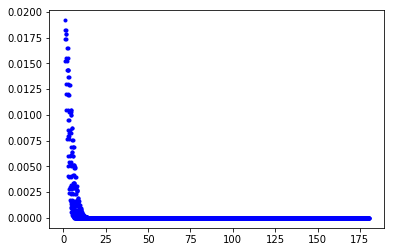

In [12]:
plt.plot(uvdist, amp/np.sum(amp), 'b.')

### Sampling (unform)

Bad, because we know that the source is very extended

In [13]:
nsample = 1000
# sample in uv is 2*nsample
# it is possible to have same number (alias), not checked

u = np.random.randint(0, imgsize, nsample) 
v = np.random.randint(imgsize/2, imgsize, nsample)

# mirroring
umirror = (imgsize-1)-u #-u
vmirror = (imgsize-1)-v #-v

# combine (mask)
uc = np.zeros((imgsize, imgsize), dtype=np.int)
uc[u,v] = 1
uc[umirror, vmirror] = 1
print uc.shape

(256, 256)


([], <a list of 0 Text yticklabel objects>)

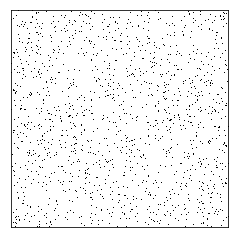

In [14]:
plt.imshow(uc, cmap="Greys")
plt.xticks([]); plt.yticks([])

In [15]:
# visibility
vis = uc * (F_mag * np.exp(1j*F_phase)) # sampling by masking

In [16]:
len(vis[np.abs(vis)>0.0])

1962

In [17]:
uvdist = []
amp = []

for i, row in enumerate(uc):
    for j, col in enumerate(row):
        if uc[i,j] == 1:
            # calculate distance
            dist = np.sqrt((i-center[0])**2 + (j-center[1])**2)
            uvdist.append(dist)
            amp.append(F_mag[i,j])

In [18]:
np.sum(amp)

3952.3245370069681

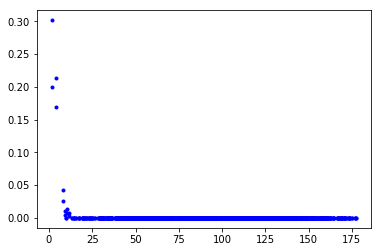

In [19]:
plt.plot(uvdist, amp/np.sum(amp), 'b.') 

In [20]:
fnew = np.fft.ifft2(np.fft.ifftshift(vis))

In [21]:
np.sum(np.abs(fnew))

1527.8962872265427

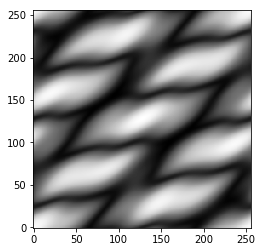

In [22]:
plt.imshow(np.abs(fnew)/np.sum(np.abs(fnew)), origin='lower', cmap='Greys_r')

### Sampling (gaussian)

dominant short baseline, will be better, because the source is extended

In [23]:
nsample = 1000
# sample in uv is 2*nsample
# it is possible to have same number (alias), not checked, so less than 2*nsample

u = np.random.normal(imgsize/2, 15, nsample) 
v = np.random.normal(imgsize/2, 15, nsample)
u = np.floor(u).astype(int)
v = np.floor(v).astype(int)

# mirroring
umirror = (imgsize-1)-u #-u
vmirror = (imgsize-1)-v #-v

# combine (mask)
uc = np.zeros((imgsize, imgsize), dtype=np.int)
uc[u,v] = 1
uc[umirror, vmirror] = 1
print uc.shape

(256, 256)


([], <a list of 0 Text yticklabel objects>)

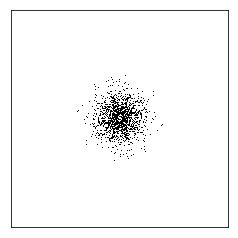

In [24]:
plt.imshow(uc, cmap="Greys")
plt.xticks([]); plt.yticks([])

In [25]:
# visibility
vis = uc * (F_mag * np.exp(1j*F_phase)) # sampling by masking

In [26]:
len(vis[np.abs(vis)>0])

1444

In [27]:
uvdist = []
amp = []

for i, row in enumerate(uc):
    for j, col in enumerate(row):
        if uc[i,j] == 1:
            # calculate distance
            dist = np.sqrt((i-center[0])**2 + (j-center[1])**2)
            uvdist.append(dist)
            amp.append(F_mag[i,j])

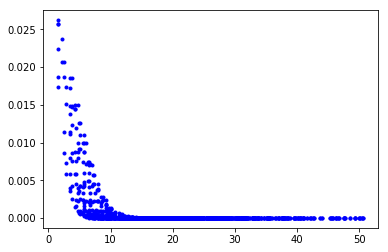

In [28]:
plt.plot(uvdist, amp/np.sum(amp), 'b.')

In [29]:
fnew = np.fft.ifft2(np.fft.ifftshift(vis))
np.sum(np.abs(fnew))

3037.117065679899

In [30]:
fnew = fnew/np.sum(np.abs(fnew))
np.sum(np.abs(fnew))

1.0

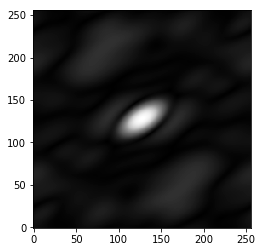

In [31]:
plt.imshow(np.abs(fnew), origin='lower', cmap='Greys_r')